In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score



In [2]:
df = pd.read_csv('../data/chocolate.csv')
df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,5,Jacque Torres,U.S.A.,2006,Ghana,Trinatario Treasure,71%,"5- B,S,C,V,L","gritty, unrefined, off notes",2.00
1,15,Neuhaus (Callebaut),Belgium,2006,Sao Tome,Sao Tome,75%,"5- B,S,C,V,L","grassy, earthy, burnt",2.75
2,15,Neuhaus (Callebaut),Belgium,2006,Blend,West Africa,73%,"5- B,S,C,V,L","non descript, poor aftertaste",2.00
3,15,Scharffen Berger,U.S.A.,2006,Blend,Bittersweet,70%,"5- B,S,C,V,L","cherry, mild bitter",3.50
4,15,Scharffen Berger,U.S.A.,2006,Blend,Extra Dark,82%,"5- B,S,C,V,L","dry, bitter, poor aftertaste",2.00


Information tends to be lacking will likely need to supplement with out side sources

additionally the categorical data in Most Memorable Characteristics and Ingrediants need to be extacted but can't be one hot encoded

Manufacturer and Specific Bean Origin or Bar name aren't specific enough to be useful and should be dropped

In [3]:
#define funtions to be used for characteristics extraction
def test_fruity(word):
    out = 0;
    fruit_list = ['fruit','fig','melon','tangerine','papaya','banana','orange','grape','cardamom','citrus','apple']
    for i in fruit_list:
        if i in word:
            out = 1;
    return out;

def test_sandy(word):
    out = 0;
    sand_list = ['sand','ash','chalk','cardboard','grit','powdery','dry']
    for i in sand_list:
        if i in word:
            out = 1;
    return out;

def test_honey(word):
    out = 0;
    sweet_list = ['honey','molasses','tofee','caramel']
    for i in sweet_list:
        if i in word:
            out = 1;
    return out;

def test_spice(word):
    out = 0;
    spice_list = ['spic','pepper']
    for i in spice_list:
        if i in word:
            out = 1;
    return out;

def test_sour(word):
    out = 0;
    sour_list = ['sour','tart','lemon','lime','acidic']
    for i in sour_list:
        if i in word:
            out = 1;
    return out;

def test_nut(word):
    out = 0;
    nut_list = ['nut','cashew','coconut']
    for i in nut_list:
        if i in word:
            out = 1;
    return out;

def test_berry(word):
    out = 0;
    berry_list = ['berry','cherry']
    for i in berry_list:
        if i in word:
            out = 1;
    return out;

def test_creamy(word):
    out = 0;
    if 'creamy' in word:
        out = 1;
    if 'smooth' in word:
        out = 1;
    return out

def test_floral(word):
    out = 0;
    if 'floral' in word:
        out = 1
    return out

def test_smokey(word):
    out = 0;
    smoke_list = ['smoke','burnt','woodsy','rustic','earthy','roast','woody']
    for i in smoke_list:
        if i in word:
            out = 1;
    return out;

def test_bad(word):
    out = 0;
    bad_list = ['poor', 'unrefined', 'chlorine','mettalic','rubber','off ','chemical','flat','artificial','pungent','wtf','why bother','this is not chocolate','synthetic','too', ' off']
    for i in bad_list:
        if i in word:
            out = 1;
    return out;

def test_sweet(word):
    out = 0;
    if 'sweet' in word:
        out = 1;
    return out

def test_coffee(word):
    out = 0
    cofee_list = ['coffee','mocha']
    for i in cofee_list:
        if i in word:
            out = 1
    return out;



In [4]:
#def funtions to extract ingrediant information
def test_num(word):
    out = 0
    cofee_list = ['1','2','3','4','5','6','7']
    for i in cofee_list:
        if i in word:
            out = i
    return out;

def test_beans(word):
    if 'B' in word:
        return 1;
    else:
        return 0;

def test_sugar(word):
    if ('S,' in word) or (',S' in word):
        return 1;
    else:
        return 0;

def test_sweetner(word):
    if 'S*' in word:
        return 1;
    else:
        return 0;

def test_butter(word):
    if 'C' in word:
        return 1;
    else:
        return 0;

def test_vanilla(word):
    if 'V' in word:
        return 1;
    else:
        return 0;

def test_lecithin(word):
    if 'L' in word:
        return 1;
    else:
        return 0;

def test_salt(word):
    if 'Sa' in word:
        return 1;
    else:
        return 0;



In [5]:
#define funtions to add in additonal country informaiton: choclate market size, longitude, latitude and climate
def export(country):
    export_dict ={'U.S.A.':1390101000,'France':1308482000,'Canada':1610247000,'U.K.':1005909000,'Italy':2096444000,
    'Belgium':3141521000,'Ecuador':12411000,'Australia':240729000, 'Switzerland':752061000,
    'Germany':4866331000,'Spain':470465000,'Denmark':159861000,'Venezuala':1453000,'Japan':81286000,
    'Austria':445760000, 'New Zealand':53467000,'Colombia':48650000,'Hungary':220915000,
    'Brazil':97136000,'Peru':25395000,'Madagascar':2605000,'Vietnam':17301000,'Singapore':442321000,
    'Dominican Republic':3957000,'South Korea':57879000,'Taiwan':10454000,'Guatamala':10965000,
    'Costa Rica': 8125000,'Israel':18036000,'Argentina':71008000,'Lithuania':150859000,
    'Mexico':604353000,'Netherlands':1844272000,'Poland':2079762000,'Sweden':381286000,'Thailand':36112000,
    'U.A.E':90366000,'Ireland':339224000,'Philippines':5703000,'Iceland':3003000,'South Africa':70081000,
    'Norway':32641000,'Portugal':34234000,'Malaysia':247820000,'Russia':729156000,'Czech Republic':312272000,
    'El Salvador':6837000,'Finland':74163000,'India':100298000,'Chile':13959000,'Ghana':18535000}
    if country in export_dict.keys():
        return export_dict[country]
    else:
        return np.nan
    
def lat(country):
    lat_dict = {'Ghana':7.946527, 'Sao Tome':0.18636, 'Colombia':4.570868, 'Dominican Republic':18.735693, 'Madagascar':-18.766947,
 'Papua New Guinea':-6.314993, 'Venezuela':6.42375, 'U.S.A.':19.8968, 'Jamaica':18.109581, 'Vanuatu':-15.376706, 'Ecuador':-1.831239,
 'Bolivia':-16.290154, 'Trinidad':10.691803, 'Mexico':23.634501, 'Sri Lanka':7.873054, 'Peru':-9.189967, 'Indonesia':-0.789275, 'Cuba':21.521757,
 'Liberia':6.428055, 'Panama':8.537981, 'Brazil':-14.235004, 'Burma':21.913965, 'Belize':17.189877, 'St. Lucia':13.909444, 'Nicaragua':12.865416,
 'Vietnam':14.058324, 'Gabon':-0.803689, 'Congo':-0.228021, 'Puerto Rico':18.220833, 'Costa Rica':9.748917, 'Haiti':18.971187,
 'Philippines':12.879721, 'Tobago':10.691803, 'Martinique':14.641528, 'Grenada':12.262776, 'Guatemala':15.783471, 'Honduras':15.199999,
 'Fiji':-16.578193, 'Uganda':1.373333, 'Tanzania':-6.369028, 'El Salvador':13.794185, 'Ivory Coast':7.5400, 'Australia':-25.274398,
 'Cameroon':7.369722, 'Togo':8.619543, 'Malaysia':4.210484, 'Solomon Islands':-9.64571, 'Samoa':-13.759029, 'India':20.593684, 'Suriname':3.919305,
 'Nigeria':9.081999, 'Sulawesi':1.8479, 'Taiwan':23.69781, 'Sierra Leone':8.460555, 'Sumatra':0.5897, 'Thailand':15.870032,
 'DR Congo':4.0383, 'St.Vincent-Grenadines':12.984305, 'Sao Tome & Principe':0.18636, 'Principe':0.18636}
    if country in lat_dict.keys():
        return lat_dict[country]
    else:
        return 5.86

def long(country):
    long_dict = {'Ghana':-1.023194, 'Sao Tome':6.613081, 'Colombia':-74.297333, 'Dominican Republic':-70.162651, 'Madagascar':46.869107,
 'Papua New Guinea':143.95555, 'Venezuela':-66.58973, 'U.S.A.':155.5828, 'Jamaica':-77.297508, 'Vanuatu':166.959158, 'Ecuador':-78.183406,
 'Bolivia':-63.588653, 'Trinidad':-61.222503, 'Mexico':-102.552784, 'Sri Lanka':80.771797, 'Peru':-75.015152, 'Indonesia':113.921327, 'Cuba':-77.781167,
 'Liberia':-9.429499, 'Panama':-80.782127, 'Brazil':-51.92528, 'Burma':95.956223, 'Belize':-88.49765, 'St. Lucia':-60.978893, 'Nicaragua':-85.207229,
 'Vietnam':108.277199, 'Gabon':11.609444, 'Congo':15.827659, 'Puerto Rico':-66.590149, 'Costa Rica':-83.753428, 'Haiti':-72.285215,
 'Philippines':121.774017, 'Tobago':-61.222503, 'Martinique':-61.024174, 'Grenada':-61.604171, 'Guatemala':-90.230759, 'Honduras':-86.241905,
 'Fiji':179.414413, 'Uganda':32.290275, 'Tanzania':34.888822, 'El Salvador':-88.89653, 'Ivory Coast':5.5471, 'Australia':133.775136,
 'Cameroon':12.354722, 'Togo':0.824782, 'Malaysia':101.975766, 'Solomon Islands':160.156194, 'Samoa':-172.104629, 'India':78.96288, 'Suriname':-56.027783,
 'Nigeria':8.675277, 'Sulawesi':120.5279, 'Taiwan':120.960515, 'Sierra Leone':-11.779889, 'Sumatra':101.3431, 'Thailand':100.992541,
 'DR Congo':21.758664, 'St.Vincent-Grenadines':-61.287228, 'Sao Tome & Principe':6.613081, 'Principe':6.613081}
    if country in long_dict.keys():
        return long_dict [country]
    else:
        return 3.303

def temp(country):
        temp_dict = {'Ghana':27.25, 'Sao Tome':27, 'Colombia':24.40, 'Dominican Republic':23.93, 'Madagascar':22.01,
 'Papua New Guinea':25.05, 'Venezuela':25.32, 'U.S.A.':27.5, 'Jamaica':24.47, 'Vanuatu':23.84, 'Ecuador':21.33,
 'Bolivia':20.98, 'Trinidad':25.86, 'Mexico':20.54, 'Sri Lanka':26.76, 'Peru':19.46, 'Indonesia':25.72, 'Cuba':25.13,
 'Liberia':25.25, 'Panama':24.72, 'Brazil':24.92, 'Burma':22.96, 'Belize':25.06, 'St. Lucia':27, 'Nicaragua':24.59,
 'Vietnam':24.07, 'Gabon':25.00, 'Congo':24.52, 'Puerto Rico':24.28, 'Costa Rica':23.85, 'Haiti':24.48,
 'Philippines':25.33, 'Tobago':25.86, 'Martinique':26.7, 'Grenada':28, 'Guatemala':23.07, 'Honduras':23.39,
 'Fiji':23.37, 'Uganda':22.60, 'Tanzania':22.31, 'El Salvador':24.77, 'Ivory Coast':26.30, 'Australia':21.51,
 'Cameroon':24.53, 'Togo':26.80, 'Malaysia':25.14, 'Solomon Islands':25.68, 'Samoa':28.5, 'India':23.95, 'Suriname':25.77,
 'Nigeria':26.78, 'Sulawesi':21.4, 'Taiwan':22, 'Sierra Leone':26.04, 'Sumatra':25.2, 'Thailand':26.25,
 'DR Congo':24.04, 'St.Vincent-Grenadines':26.82, 'Sao Tome & Principe':24.7, 'Principe':24.7}
        if country in temp_dict.keys():
            return temp_dict[country]
        else:
            return 24.646

def precipitation(country):
        precipitation_dict = {'Ghana':1184.94, 'Sao Tome':1382,  'Colombia':2618.59, 'Dominican Republic':1417.07, 'Madagascar':1475.68,
         'Papua New Guinea':3106.06, 'Venezuela':1957.65, 'U.S.A.':433, 'Jamaica':2114.18, 'Vanuatu':2662.11, 'Ecuador':1945.27,
         'Bolivia':1095.56, 'Trinidad':1831.41, 'Mexico':738.14, 'Sri Lanka':1699.41, 'Peru':1513.24, 'Indonesia':2801.54, 'Cuba':1329.49,
         'Liberia':2460.08, 'Panama':2487.03, 'Brazil':1762.97, 'Burma':2007.70, 'Belize':2089.26, 'St. Lucia':1400, 'Nicaragua':2406.97,
         'Vietnam':1835.16, 'Gabon':1819.44, 'Congo':1635.05, 'Puerto Rico':2126.02, 'Costa Rica':3268.27, 'Haiti':1480.20,
         'Philippines':2317.59, 'Tobago':1831.41, 'Martinique':1159, 'Grenada':1208, 'Guatemala':2606.33, 'Honduras':1945.76,
         'Fiji':2905.11, 'Uganda':1207.90, 'Tanzania':1052.38, 'El Salvador':1672.81, 'Ivory Coast':1356.08, 'Australia':473.09,
         'Cameroon':1613.07, 'Togo':1189.11, 'Malaysia':2992.79, 'Solomon Islands':3157.37, 'Samoa':4500, 'India':1072.22, 'Suriname':2316.81,
         'Nigeria':1138.53, 'Sulawesi':3835, 'Taiwan':2590, 'Sierra Leone':2471.72, 'Sumatra':4000, 'Thailand':1532.48,
         'DR Congo':1535.04, 'St.Vincent-Grenadines':1585.97, 'Sao Tome & Principe':1382, 'Principe':1382}
        if country in precipitation_dict.keys():
            return precipitation_dict[country]
        else:
            return 1935.22




In [6]:
#creat a funtion to clean data in easy step
def data_clean(df, ohe):
    #add in export info
    df['Country_export'] = df['Company Location'].apply(export)
    df['Country_export'] = df['Country_export'].fillna(500000)
    print(df)
    df = df.dropna()
    #add in climate info
    df['Latitude'] = df["Country of Bean Origin"].apply(lat)
    df['Longitude'] = df["Country of Bean Origin"].apply(long)
    df['Temperature (Celsius)'] = df["Country of Bean Origin"].apply(temp)
    df['Precipitation (millimeters)'] = df["Country of Bean Origin"].apply(precipitation)
    #extract flavor info
    df['fruity'] = df['Most Memorable Characteristics'].apply(test_fruity)
    df['honey'] = df['Most Memorable Characteristics'].apply(test_honey)
    df['spice'] = df['Most Memorable Characteristics'].apply(test_spice)
    df['sour'] = df['Most Memorable Characteristics'].apply(test_sour)
    df['nut'] = df['Most Memorable Characteristics'].apply(test_nut)
    df['berry'] = df['Most Memorable Characteristics'].apply(test_berry)
    df['creamy'] = df['Most Memorable Characteristics'].apply(test_creamy)
    df['floral'] = df['Most Memorable Characteristics'].apply(test_floral)
    df['smokey'] = df['Most Memorable Characteristics'].apply(test_smokey)
    df['bad'] = df['Most Memorable Characteristics'].apply(test_bad)
    df['sweet'] = df['Most Memorable Characteristics'].apply(test_sweet)
    df['coffee'] = df['Most Memorable Characteristics'].apply(test_coffee)
    #extract ingrediant info
    df['num_ingred'] = df['Ingredients'].apply(test_num)
    df['beans'] = df['Ingredients'].apply(test_beans)
    df['sugar'] = df['Ingredients'].apply(test_sugar)
    df['sweetner'] = df['Ingredients'].apply(test_sweetner)
    df['butter'] = df['Ingredients'].apply(test_butter)
    df['vanilla'] =df['Ingredients'].apply(test_vanilla)
    df['lecithin'] = df['Ingredients'].apply(test_lecithin)
    df['salt'] = df['Ingredients'].apply(test_salt)
    #convert coca percent to a float
    df['Cocoa Percent'] = df['Cocoa Percent'].str.rstrip('%').astype('float') / 100.0
    
    df = df.drop(columns = ('Specific Bean Origin or Bar Name'))
    #encode company location and country of origin
    ohe_cols = ['Company Location', 'Country of Bean Origin']
    df_encoded = ohe.transform(df[ohe_cols])
    encoded_df = pd.DataFrame(df_encoded, columns=ohe.get_feature_names())
    hold_df = pd.concat([df, encoded_df], axis=1)
    #drop unnecessary columns
    df = hold_df.drop(['Company (Manufacturer)', 'Company Location', 'Country of Bean Origin','Most Memorable Characteristics','Ingredients','Review Date'], axis =1)
    print(df)
    df = df.dropna()

    return df;

Data cleaning prep is done next to apply it

In [7]:
#prepare ohe
ohe_cols = ['Company Location', 'Country of Bean Origin']

ohe = OneHotEncoder(sparse=False)
ohe.fit(df[ohe_cols])



OneHotEncoder(sparse=False)

In [8]:
#apply funtion
df = data_clean(df,ohe)



      REF Company (Manufacturer) Company Location  Review Date  \
0       5          Jacque Torres           U.S.A.         2006   
1      15    Neuhaus (Callebaut)          Belgium         2006   
2      15    Neuhaus (Callebaut)          Belgium         2006   
3      15       Scharffen Berger           U.S.A.         2006   
4      15       Scharffen Berger           U.S.A.         2006   
...   ...                    ...              ...          ...   
2357  995            Bahen & Co.        Australia         2012   
2358  999          Mast Brothers           U.S.A.         2012   
2359  999          Mast Brothers           U.S.A.         2012   
2360  999            Bahen & Co.        Australia         2012   
2361  999            Bahen & Co.        Australia         2012   

     Country of Bean Origin Specific Bean Origin or Bar Name Cocoa Percent  \
0                     Ghana              Trinatario Treasure           71%   
1                  Sao Tome                        

<ipython-input-6-44145c596bb1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'] = df["Country of Bean Origin"].apply(lat)
<ipython-input-6-44145c596bb1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude'] = df["Country of Bean Origin"].apply(long)
<ipython-input-6-44145c596bb1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

Prolem 1: rating is too spread out of a target and as such will be binned to try and decrease the target and increase model accuracy

In [10]:
def biner(integer):
    if integer < 1.5:
        return 1.0
    elif integer < 2.0:
        return 1.5
    elif integer < 2.5:
        return 2.0
    elif integer < 3.0:
        return 2.5
    elif integer < 3.5:
        return 3.0
    elif integer < 4.0:
        return 3.5
    else:
        return 4.0 
    

In [11]:
df['Rating'] = df['Rating'].apply(biner)
df['Rating'] = df['Rating'].astype(str)


With rating binned, now to split and scale the data

In [17]:
from sklearn.model_selection import train_test_split
y= df['Rating']
x = df.drop(['Rating'], axis=1)

x_tr, x_test, y_tr, y_test = train_test_split(x,y, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_tr, y_tr, random_state=57)

In [18]:
scaler = StandardScaler()
#only df['Precipitation (millimeters)'] and df['Country_export'] need to be scaled
scaled_features = df.copy()

col_names = ['Precipitation (millimeters)','Country_export']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features
df = scaled_features

Now to start using models with grid searches being used to try and optimize

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

def modeling_function(model, X_train, y_train, X_val, y_val):

    # fit model on training data
    model.fit(X_train, y_train)

    # make predictions on training and validation data
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Print accuracy score
    print('Training accuracy: ', accuracy_score(y_train, train_preds))
    print('Validation accuracy: ', accuracy_score(y_val, val_preds))

    # return fitted model
    return model



In [21]:
dt = DecisionTreeClassifier(random_state=2021)

modeling_function(dt, x_train, y_train, x_val, y_val)

Training accuracy:  1.0
Validation accuracy:  0.7493917274939172


DecisionTreeClassifier(random_state=2021)

Overfit as expected of a decision tree, hopefully limitting the depth can help adress that

In [22]:
dt = DecisionTreeClassifier(random_state=2021, max_depth=10)

modeling_function(dt,  x_train, y_train, x_val, y_val)

Training accuracy:  0.935098650051921
Validation accuracy:  0.7907542579075426


DecisionTreeClassifier(max_depth=10, random_state=2021)

Better but that accuracy is concerningly low, let's move on to a random forest and test the results, this time optimizing with a grid search

In [18]:
param_grid = {'n_estimators': [21, 22, 23],
                'max_depth': [1, 3, 5, 7, 10],
                'min_samples_leaf': [1, 2, 3, 4]}

rf = RandomForestClassifier(random_state=42)


rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid)
rf_gs.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'n_estimators': [21, 22, 23]})

In [24]:
best_model = rf_gs.best_estimator_

In [25]:
#test params
rf_gs.best_params_

{'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 23}

In [27]:
modeling_function(best_model,x_train, y_train, x_val, y_val)

Training accuracy:  0.6382806163828062
Validation accuracy:  0.49391727493917276


RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=23,
                       random_state=42)

Definently not great just in terms of pure accuracy, let's move on to some other models and see if they can improve things

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

GS_KNN = KNeighborsClassifier()

#tried wieghts distance, lead to overfitting so it's been removed as an option
pram_grid = {'n_neighbors': [30,31,32,33,34], 'weights' : ['uniform'], 'algorithm':['ball_tree','kd_tree','brute'],'leaf_size':[1,2,3,4],'p':[1,2]}

GSCV = GridSearchCV(GS_KNN,pram_grid,scoring = 'accuracy')

GSCV.fit(x_train,y_train)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 4],
                         'n_neighbors': [30, 31, 32, 33, 34], 'p': [1, 2],
                         'weights': ['uniform']},
             scoring='accuracy')

In [29]:
train_pred = GSCV.predict(x_train)
val_pred = GSCV.predict(x_val)


train_acc = accuracy_score(y_train,train_pred)
val_acc = accuracy_score(y_val,val_pred)

print(train_acc)
print(val_acc)

0.4282238442822384
0.35523114355231145


Hm, not great either we're going to need to over haul our strategy. Instead of bining into 7 let's just switch to binary results, 3.0 and above or not.

Also opun review accuracy may not be the best metric, given the danger of miss intesting we'll switch to precision instead. In addition let's bring in a new type of model, the support vector machine, and give it a try

First we need to reclean data for the new binning strategy

In [9]:
df = pd.read_csv('../data/chocolate.csv')
ohe_cols = ['Company Location', 'Country of Bean Origin']

ohe = OneHotEncoder(sparse=False)
ohe.fit(df[ohe_cols])

df = data_clean(df,ohe)



      REF Company (Manufacturer) Company Location  Review Date  \
0       5          Jacque Torres           U.S.A.         2006   
1      15    Neuhaus (Callebaut)          Belgium         2006   
2      15    Neuhaus (Callebaut)          Belgium         2006   
3      15       Scharffen Berger           U.S.A.         2006   
4      15       Scharffen Berger           U.S.A.         2006   
...   ...                    ...              ...          ...   
2357  995            Bahen & Co.        Australia         2012   
2358  999          Mast Brothers           U.S.A.         2012   
2359  999          Mast Brothers           U.S.A.         2012   
2360  999            Bahen & Co.        Australia         2012   
2361  999            Bahen & Co.        Australia         2012   

     Country of Bean Origin Specific Bean Origin or Bar Name Cocoa Percent  \
0                     Ghana              Trinatario Treasure           71%   
1                  Sao Tome                        

<ipython-input-6-44145c596bb1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'] = df["Country of Bean Origin"].apply(lat)
<ipython-input-6-44145c596bb1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude'] = df["Country of Bean Origin"].apply(long)
<ipython-input-6-44145c596bb1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [10]:
def binarizer2(integer):
    if integer < 3.0:
        return 0
    else:
        return 1
    
df['Rating'] = df['Rating'].apply(binarizer2)

df['Rating'].value_counts()

1    1702
0     491
Name: Rating, dtype: int64

Binned, now for train test split and scaling

In [11]:
from sklearn.model_selection import train_test_split
y= df['Rating']
x = df.drop(['Rating'], axis=1)

x_tr, x_test, y_tr, y_test = train_test_split(x,y, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_tr, y_tr, random_state=57)

In [12]:
scaler = StandardScaler()
#only df['Precipitation (millimeters)'] and df['Country_export'] need to be scaled
scaled_features = df.copy()

col_names = ['Precipitation (millimeters)','Country_export']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features
df = scaled_features

Now for the model.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

GS_SCV = SVC()

#tried wieghts distance, lead to overfitting so it's been removed as an option
pram_grid = {'C': [0.25,0.5,0.1], 'kernel' : ['linear','poly','rbf','sigmoid'],'gamma':['scale','auto'], 'degree':[1,2,3,4,5], 'max_iter':[1000000]}

GSCV = GridSearchCV(GS_SCV,pram_grid,scoring = 'precision')

GSCV.fit(x_train,y_train)

In [ ]:
GSCV.best_params_

In [ ]:

train_pred = GSCV.predict(x_train)
val_pred = GSCV.predict(x_val)
from sklearn.metrics import precision_score

train_precision = precision_score(y_train,train_pred)
val_precision = precision_score(y_val,val_pred)

print(train_precision)
print(val_precision)

Huh, pretty good, but there is a class imbalance with the new bining so let's introduce smote and try again, for time we'll just reuse the hyper parameters

In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train, y_train = smote.fit_sample(x_train, y_train) 

In [37]:
from sklearn.svm import SVC


svm = SVC(C = 0.25, kernel = 'poly',degree = 1,gamma = 'auto', max_iter=1000000 )

svm.fit(x_train,y_train)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(C=0.25, degree=1, gamma='auto', kernel='poly', max_iter=1000000)

In [38]:
train_pred = svm.predict(x_train)
np.set_printoptions(threshold=np.inf)
train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

From the looks of things, we're actually just dealing with a naive classifier which was preforming well due to the class imbalance, let's call this and bust and move back to the KNN and RandomForest, starting with RandomForest

In [14]:
#need to adjust funtion for new scoring
def modeling_function(model, X_train, y_train, X_val, y_val):

    # fit model on training data
    model.fit(X_train, y_train)

    # make predictions on training and validation data
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Print accuracy score
    print('Training precission: ', precision_score(y_train, train_preds))
    print('Validation accuracy: ', precision_score(y_val, val_preds))

    # return fitted model
    return model

In [19]:
from sklearn.model_selection import GridSearchCV


param_grid = {'n_estimators': [21, 22, 23],
                'max_depth': [1, 3, 5, 7, 10],
                'min_samples_leaf': [1, 2, 3, 4]}

rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring = 'precision')
rf_gs.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'n_estimators': [21, 22, 23]},
             scoring='precision')

In [20]:
best_model = rf_gs.best_estimator_

In [21]:
rf_gs.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 23}

In [22]:
train_pred = rf_gs.predict(x_train)
np.set_printoptions(threshold=np.inf)
train_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [23]:
modeling_function(best_model,x_train, y_train, x_val, y_val)

Training accuracy:  0.9397715472481828
Validation accuracy:  0.8223844282238443


RandomForestClassifier(max_depth=10, n_estimators=23, random_state=42)

In [24]:
test_pred = best_model.predict(x_test)
test_precision = precision_score(test_pred, y_test)
print(test_precision)

0.9593301435406698


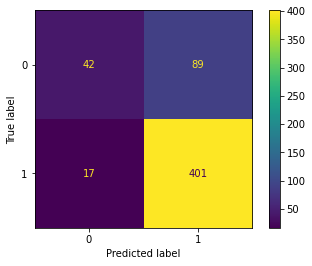

In [25]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_model,x_test, y_test)

In [26]:
import matplotlib.pyplot as plt
plt.savefig('../images/confusion_random.png');


<Figure size 432x288 with 0 Axes>

And to finish let's do KNN

In [45]:
GS_KNN = KNeighborsClassifier()

#tried wieghts distance, lead to overfitting so it's been removed as an option
pram_grid = {'n_neighbors': [7,8,9,10,11,12], 'weights' : ['uniform'], 'algorithm':['ball_tree','kd_tree','brute'],'leaf_size':[10,15,20,25],'p':[1,2]}

GSCV = GridSearchCV(GS_KNN,pram_grid,scoring = 'precision')

GSCV.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 15, 20, 25],
                         'n_neighbors': [7, 8, 9, 10, 11, 12], 'p': [1, 2],
                         'weights': ['uniform']},
             scoring='precision')

In [46]:
train_pred = GSCV.predict(x_train)
val_pred = GSCV.predict(x_val)

In [47]:
#check that it's not naive after previous error
np.set_printoptions(threshold=np.inf)
train_pred

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,

In [48]:
train_precision = precision_score(y_train,train_pred)
val_precision = precision_score(y_val,val_pred)
print(train_precision)
print(val_precision)


0.8487179487179487
0.7925311203319502
